<a href="https://colab.research.google.com/github/somnathsingh31/Projects/blob/Temperory/K_mean_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
cust_data = pd.read_csv('customerdata.csv', header = None, names = ['Customer Id', 'Income', 'Age'])

In [3]:
cust_data.head()

,Customer Id,Income,Age
0,1,41100,48.75
1,2,54100,28.10
2,3,47800,46.75
3,4,19100,40.25
4,5,18200,35.80


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

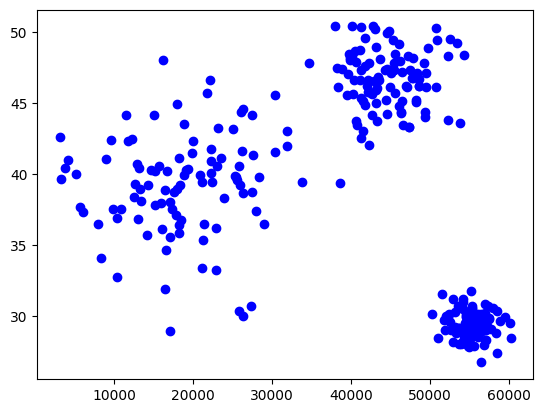

In [5]:
plt.scatter(cust_data['Income'], cust_data['Age'], c = 'blue')
plt.show()

In [ ]:
#sns.scatterplot(data = driver_data, x = 'mean_dist_day', y = 'mean_over_speed_perc')

In [6]:
num_centroid = 5


In [7]:
import math
import random

In [8]:
def modify_data(data):
  return (data - min(data))/(max(data) - min(data))

In [9]:
modified_sal, modified_age = modify_data(cust_data['Income']), modify_data(cust_data['Age'])

In [10]:
def manhattan_distance(point1, point2):
  '''point1 and points2 are in form (p1, p2) and (q1, q2) respectively'''
  dist = abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])
  return dist

In [11]:
def kmeans1(num_centroid, feature_1, feature_2, iter = 100):
  #Here distance used is Manhatten Distance
  ''' num_centroid is the number of classes in which we want to segmentation, feature_1 and feature_2 are the list or pandas series
      containg values corresponding to both features'''

  f1 = list(feature_1)
  f2 = list(feature_2)

  points = [(f1[n], f2[n]) for n in range(0,len(f1))]
  centroids  = random.sample(points, num_centroid)

  if len(f1) != len(f2):
    return ('Error! : Feature 1 and Feature 2 are not having the same length')
  else:
    while iter > 0:
      category = {x:[] for x in range(1,num_centroid + 1)}
      for point in points:
        dist_point_to_centriods = [manhattan_distance(point, centriod) for centriod in centroids]
        min_dist = min(dist_point_to_centriods)
        point_belongs_to_centriod = dist_point_to_centriods.index(min_dist) + 1
        category[point_belongs_to_centriod].append(point)

      iter -= 1
      centroids = [tuple([sum(point)/len(point) for point in zip(*category[item])]) for item in category]

    return centroids, category



In [12]:
def kmeans2(num_centroid, feature_1, feature_2, iter = 100):
  #Here distance used is Euclidean distance
  ''' num_centroid is the number of classes in which we want to segmentation, feature_1 and feature_2 are the list or pandas series
      containg values corresponding to both features'''

  f1 = list(feature_1)
  f2 = list(feature_2)

  points = [(f1[n], f2[n]) for n in range(0,len(f1))]
  #category = {x:[] for x in range(1,num_centroid + 1)}
  centroids  = random.sample(points, num_centroid)

  if len(f1) != len(f2):
    return ('Error! : Feature 1 and Feature 2 are not having the same length')
  else:
    while iter > 0:
      category = {x:[] for x in range(1,num_centroid + 1)}
      for point in points:
        dist_point_to_centriods = [math.dist(point, centriod) for centriod in centroids]
        min_dist = min(dist_point_to_centriods)
        point_belongs_to_centriod = dist_point_to_centriods.index(min_dist) + 1
        category[point_belongs_to_centriod].append(point)

      #old_centriods = centriods
      iter -= 1
      new_centroids = [tuple([sum(point)/len(point) for point in zip(*category[item])]) for item in category]

      #if new_centroids == centriods:
        #break

      centroids = new_centroids
      #stop = [math.dist(old_centriods[x], centriods[x]) for x in range(len(centriods))]

    return centroids, category



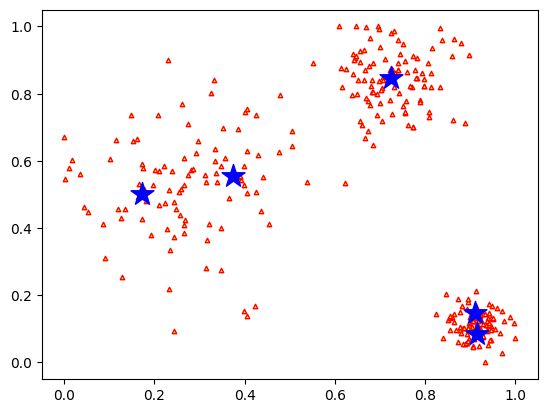

([(0.9143839011333973, 0.08434837990605844), (0.1720490367775832, 0.5001265822784808), (0.37513849672969, 0.5537328855592871), (0.7248357059874115, 0.8453440280736937), (0.9103849163468346, 0.1458389442499327)], {1: [(0.8931698774080561, 0.059071729957806), (0.9387040280210157, 0.10759493670886079), (0.9089316987740805, 0.06962025316455706), (0.8774080560420315, 0.09704641350210974), (0.8774080560420315, 0.10548523206751055), (0.9457092819614711, 0.06751054852320681), (0.9352014010507881, 0.11181434599156127), (0.8896672504378283, 0.054852320675105516), (0.8966725043782837, 0.09704641350210974), (0.9281961471103327, 0.07594936708860762), (0.8984238178633975, 0.06962025316455706), (0.8791593695271454, 0.08649789029535868), (0.8844133099824869, 0.10337552742616031), (0.9474605954465849, 0.10759493670886079), (0.9281961471103327, 0.11392405063291136), (0.9667250437828371, 0.08860759493670892), (0.8686514886164624, 0.09704641350210974), (0.9369527145359019, 0.09282700421940926), (0.9141856

In [13]:
first_kmean = kmeans1(5, modified_sal, modified_age, iter = 30)
plt.scatter(modified_sal, modified_age, c ="yellow", marker = '^', s = 10, edgecolor ="red")
for k in [tuple([sum(point)/len(point) for point in zip(*first_kmean[1][item])]) for item in first_kmean[1]]:
  plt.scatter(k[0], k[1],c = 'blue', marker = '*', s = 300)

plt.show()
print(first_kmean)

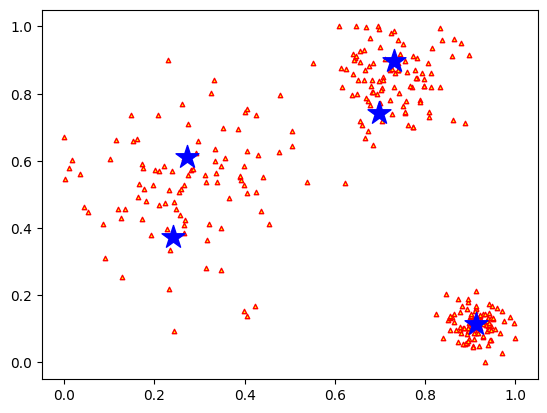

([(0.27329246935201396, 0.6117440225035163), (0.6983042159668533, 0.7413296284861581), (0.7304071803852888, 0.8967563291139242), (0.9125043782837128, 0.11324894514767936), (0.24053039779834876, 0.3722121760096444)], {1: [(0.28021015761821366, 0.5717299578059072), (0.29246935201401053, 0.6223628691983124), (0.26444833625218916, 0.609704641350211), (0.3327495621716287, 0.8417721518987342), (0.2381786339754816, 0.5696202531645571), (0.17688266199649738, 0.5168776371308018), (0.36427320490367776, 0.48945147679324885), (0.27495621716287216, 0.7109704641350211), (0.3117338003502627, 0.5590717299578061), (0.4290718038528897, 0.6181434599156119), (0.22066549912434325, 0.5843881856540084), (0.2084063047285464, 0.7362869198312236), (0.3905429071803853, 0.5527426160337552), (0.3520140105078809, 0.6983122362869199), (0.0017513134851138354, 0.5464135021097046), (0.14711033274956217, 0.7362869198312236), (0.010507880910683012, 0.5801687763713081), (0.0, 0.6708860759493672), (0.39929947460595444, 0.5

In [14]:
second_kmeans = kmeans2(5, modified_sal, modified_age, iter = 30)
plt.scatter(modified_sal, modified_age, c ="yellow", marker = '^', s = 10, edgecolor ="red")
for k in [tuple([sum(point)/len(point) for point in zip(*second_kmeans[1][item])]) for item in second_kmeans[1]]:
  plt.scatter(k[0], k[1],c = 'blue', marker = '*', s = 300)

plt.show()
print(second_kmeans)